In [1]:
import numpy as np
from scipy import sparse
from scipy.sparse.linalg import spsolve
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.signal import argrelextrema
from sklearn.mixture import GaussianMixture
from scipy.optimize import curve_fit

In [3]:
#Uploading the test data set
data = pd.read_csv("data.csv", comment='#',sep=',')
data.head()

,Grey Values,Size in nt in L1
0,8800.071,120.970000
1,8812.929,120.760747
2,8829.071,120.551856
3,8859.500,120.343327
4,8889.214,120.135158


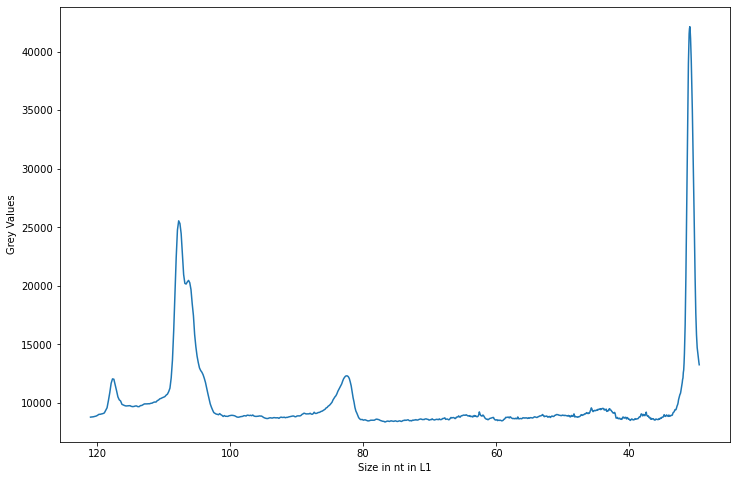

In [4]:
#Plotting the initial data
plt.figure(figsize=(12, 8))
plot = plt.plot(data['Size in nt in L1'], data['Grey Values'])
ax = plt.gca().invert_xaxis()
plt.xlabel("Size in nt in L1")
plt.ylabel("Grey Values")
plt.show()

In [5]:
#Adjusting the baseline
def baseline_als(y, lam, p, niter=10):
    L = len(y)
    D = sparse.diags([1,-2,1],[0,-1,-2], shape=(L,L-2))
    w = np.ones(L)
    for i in range(niter):
        W = sparse.spdiags(w, 0, L, L)
        Z = W + lam * D.dot(D.transpose())
        z = spsolve(Z, w*y)
        w = p * (y > z) + (1-p) * (y < z)
    return z

In [6]:
baseline = baseline_als(data['Grey Values'], 10000, 0.05)
new_y = data['Grey Values']-baseline
new_y

0        -9.018474
1       -23.885526
2       -35.467722
3       -32.758935
4       -30.754670
          ...     
811   -1334.120194
812   -1413.996221
813   -1501.784141
814   -1520.418584
815   -1552.833507
Name: Grey Values, Length: 816, dtype: float64

In [7]:
#Creating a new dataframe with new grey values
data1 = data['Size in nt in L1']
data_grey = new_y.to_frame(name="Grey Values")
df = pd.concat([data1, data_grey], axis=1)
df

,Size in nt in L1,Grey Values
0,120.970000,-9.018474
1,120.760747,-23.885526
2,120.551856,-35.467722
3,120.343327,-32.758935
4,120.135158,-30.754670
...,...,...
811,29.709526,-1334.120194
812,29.658135,-1413.996221
813,29.606832,-1501.784141
814,29.555619,-1520.418584


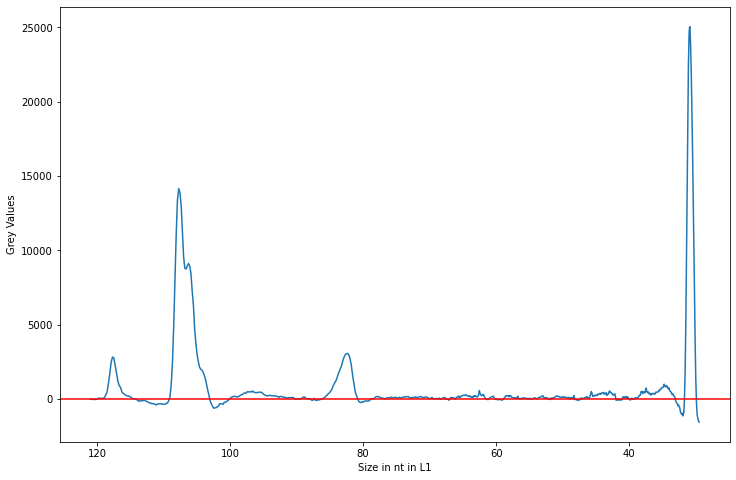

In [8]:
#Plotting the data after baseline correction
plt.figure(figsize=(12, 8))
initial_plot = plt.plot(data['Size in nt in L1'], new_y)
ax = plt.gca().invert_xaxis() 
plt.axhline(y = 0.5, color = 'r', linestyle = '-')
plt.xlabel("Size in nt in L1")
plt.ylabel("Grey Values")
plt.show()

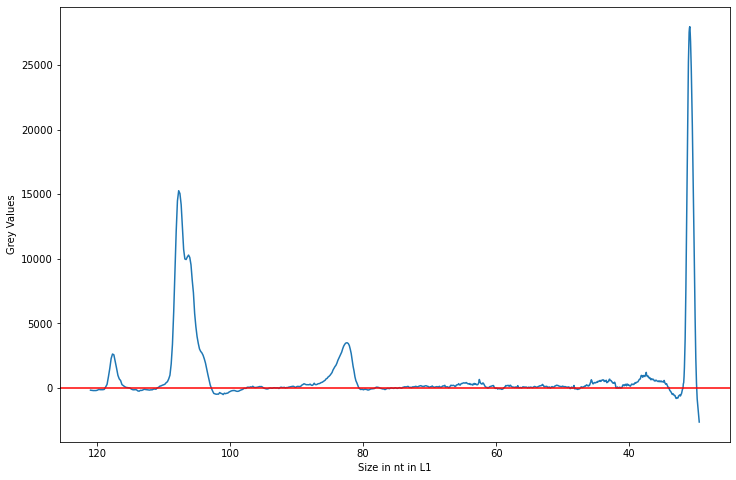

In [9]:
baseline2 = baseline_als(data['Grey Values'], 100000, 0.05)
new_y2 = data['Grey Values']-baseline2
new_y2

#Creating a new dataframe with new grey values
data2 = data['Size in nt in L1']
data_grey2 = new_y2.to_frame(name="Grey Values")
df2 = pd.concat([data1, data_grey], axis=1)

plt.figure(figsize=(12, 8))
initial_plot = plt.plot(data['Size in nt in L1'], new_y2)
ax = plt.gca().invert_xaxis()
plt.axhline(y = 0.5, color = 'r', linestyle = '-')
plt.xlabel("Size in nt in L1")
plt.ylabel("Grey Values")
plt.show()

In [10]:
#converting negative values to 0 → for plotting bar charts (histograms)
df[df < 0] = 0
df

,Size in nt in L1,Grey Values
0,120.970000,0.0
1,120.760747,0.0
2,120.551856,0.0
3,120.343327,0.0
4,120.135158,0.0
...,...,...
811,29.709526,0.0
812,29.658135,0.0
813,29.606832,0.0
814,29.555619,0.0


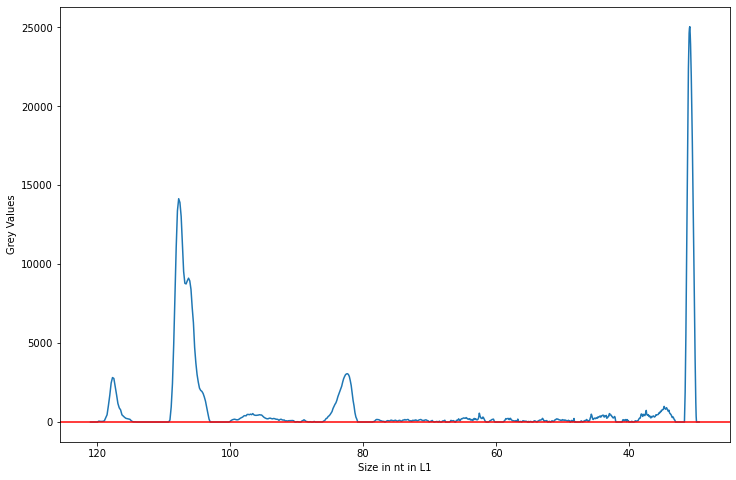

In [11]:
plt.figure(figsize=(12, 8))
plot = plt.plot(df['Size in nt in L1'], df['Grey Values'])
ax = plt.gca().invert_xaxis()
plt.axhline(y = 0.5, color = 'r', linestyle = '-')
plt.xlabel("Size in nt in L1")
plt.ylabel("Grey Values")
plt.show()

In [12]:
#Finding peak values:
peaks, values = find_peaks(df['Grey Values'], height=2000)
peaks

array([ 16,  67,  75, 222, 788], dtype=int64)

In [14]:
values.values()

dict_values([array([ 2817.54112275, 14146.94750374,  9111.35050033,  3061.72938725,
       25040.76890789])])

In [15]:
peak_values = df.iloc[peaks, 0]
peak_values

16     117.665043
67     107.721184
75     106.239497
222     82.367963
788     30.916418
Name: Size in nt in L1, dtype: float64

In [16]:
peak_values.to_numpy()
peak_values.shape

(5,)

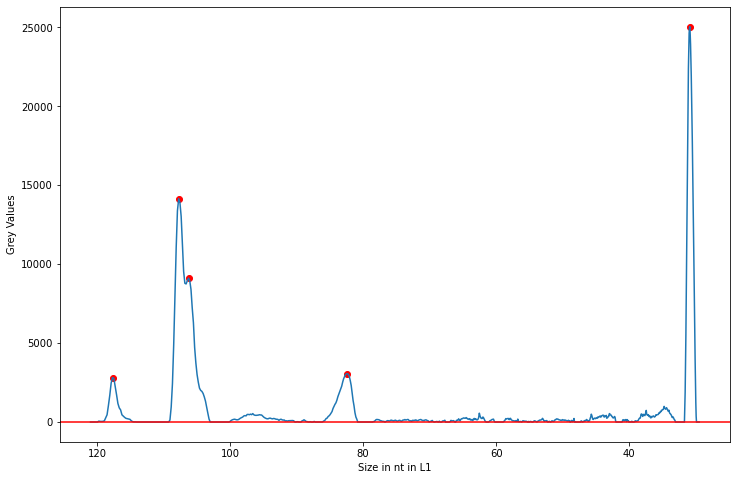

In [17]:
plt.figure(figsize=(12, 8))
plot = plt.plot(df['Size in nt in L1'], df['Grey Values'])
ax = plt.gca().invert_xaxis()
plt.axhline(y = 0.5, color = 'r', linestyle = '-')
plt.scatter(peak_values, values.values(), color='red')
plt.xlabel("Size in nt in L1")
plt.ylabel("Grey Values")
plt.show()

In [18]:
#Finding local minima values to determine where the peak starts/ends
argrelextrema(df.iloc[:,1].to_numpy(), np.less)

(array([  8,  32,  73, 116, 124, 127, 129, 133, 143, 148, 154, 158, 160,
        162, 170, 183, 263, 268, 273, 277, 282, 285, 287, 292, 294, 296,
        298, 301, 307, 309, 315, 318, 322, 327, 344, 352, 355, 361, 365,
        367, 369, 372, 375, 378, 384, 420, 424, 430, 433, 436, 439, 443,
        448, 452, 455, 460, 467, 479, 482, 485, 489, 494, 501, 506, 508,
        511, 513, 517, 519, 521, 527, 531, 545, 548, 551, 556, 558, 566,
        570, 574, 576, 580, 587, 590, 592, 596, 606, 628, 633, 637, 651,
        654, 657, 663, 669, 674, 680, 684, 688, 691, 696, 701, 708, 711,
        714, 724, 730, 741], dtype=int64),)

In [20]:
peak_values

16     117.665043
67     107.721184
75     106.239497
222     82.367963
788     30.916418
Name: Size in nt in L1, dtype: float64

In [21]:
#It is more accurate when the values are not 0!
argrelextrema(new_y.to_numpy(), np.less)

(array([  2,   8,  32,  36,  38,  46,  49,  51,  56,  73,  96, 102, 104,
        106, 116, 124, 127, 129, 133, 143, 148, 154, 158, 160, 162, 170,
        174, 183, 186, 190, 193, 236, 239, 242, 244, 263, 268, 273, 277,
        282, 285, 287, 292, 294, 296, 298, 301, 307, 309, 315, 318, 322,
        327, 329, 336, 340, 344, 349, 352, 355, 361, 365, 367, 369, 372,
        375, 378, 384, 391, 393, 404, 407, 410, 413, 420, 424, 430, 433,
        436, 439, 443, 448, 452, 455, 460, 467, 479, 482, 485, 489, 494,
        501, 506, 508, 511, 513, 517, 519, 521, 523, 527, 531, 534, 537,
        540, 545, 548, 551, 556, 558, 566, 570, 574, 576, 580, 587, 590,
        592, 596, 606, 611, 615, 620, 623, 628, 633, 637, 641, 647, 649,
        651, 654, 657, 663, 669, 674, 680, 684, 688, 691, 696, 701, 708,
        711, 714, 724, 730, 741, 756, 767, 769, 771], dtype=int64),)

In [23]:
#Getting the peak location (needs to be automated):
#16: 8;32
#67/75: 56;96
#222: 193;236
#788: 771; 816

#"Cut out" the peak:
cut_data=df[56:97]
cut_data

,Size in nt in L1,Grey Values
56,109.792304,0.000000
57,109.602386,0.000000
58,109.412797,0.000000
59,109.223536,0.000000
60,109.034602,128.777497
61,108.845995,954.372434
62,108.657714,2427.171159
63,108.469759,4899.530045
64,108.282129,7957.651330
65,108.094824,11065.785755


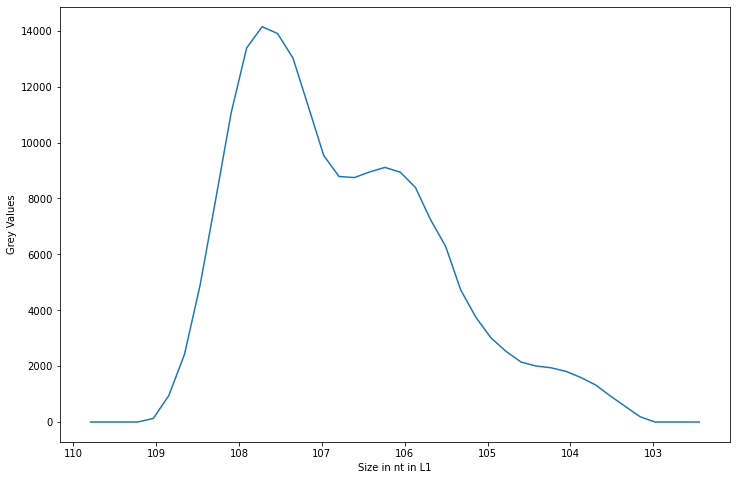

In [24]:
#Plot of the peak:
plt.figure(figsize=(12, 8))
plot = plt.plot(cut_data['Size in nt in L1'], cut_data['Grey Values'])
ax = plt.gca().invert_xaxis()
#plt.axhline(y = 0.5, color = 'r', linestyle = '-')
plt.xlabel("Size in nt in L1")
plt.ylabel("Grey Values")
plt.show()

In [31]:
#Initiating a Gaussian mixture model and fitting it to the data
gmm_learning =GaussianMixture(n_components=len(cut_data), covariance_type='full').fit(cut_data.dropna().values)

#Generating 1000 data points based on the learning
generated_distribution = gmm_learning.sample(1000)[0]

C:\Users\Marius\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


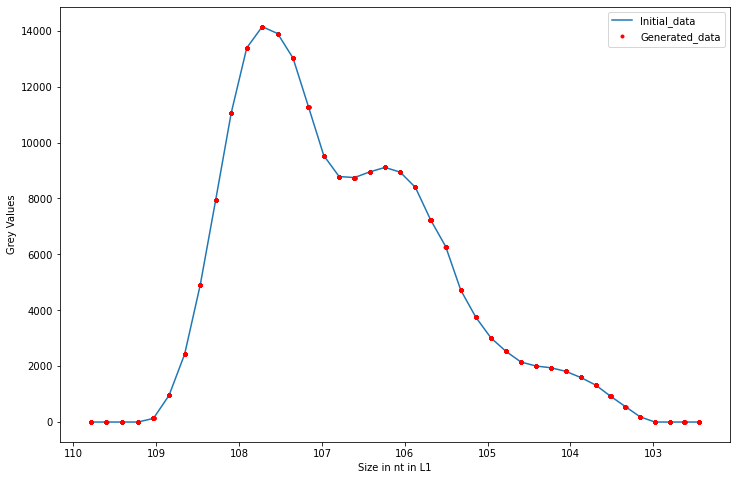

In [32]:
plt.figure(figsize=(12, 8))
new_plot = plt.plot(cut_data['Size in nt in L1'], cut_data['Grey Values'], label='Initial_data')
plt.plot(generated_distribution[:,0],generated_distribution[:,1],'r.',label='Generated_data')
ax = plt.gca().invert_xaxis()
plt.xlabel("Size in nt in L1")
plt.ylabel("Grey Values")
plt.legend()
plt.show()

In [33]:
#Performing clustering on the given distribution. GeneratedData(df) columns; nComponents(int): 
#the number of clusters to identify

def gmmClustering(generateddata,nComponents):
    # creating a model and fitting the model to the data
    gmm =GaussianMixture(n_components=nComponents, covariance_type='full').fit(generateddata) 
    mean = gmm.means_[:,0] # the first columns contains the means   
    #covariance returns a set of arrays each for one cluster. The main diagonal contains the variance
    covariance = gmm.covariances_    
    # the weights here are the population fractions
    weight = gmm.weights_
    
    cluster_parms =[] # to store the cluster parameters
    for i in range(nComponents):
        cluster_parms.append([weight[i],mean[i],np.sqrt(np.diag(covariance[i]))[0]])
    return list(np.hstack(cluster_parms)) #returns: list: [weight, mean,standard deviation] of each cluster

# writing the gaussian function
def gaussian_func(x,*params):
    """ generate the gaussian distribution"""
    y = np.zeros_like(x)
    for i in range(0,len(params),3):
        amp= params[i] # amplitude
        ctr = params[i+1] # peak location
        width = params[i+2] # standard deviation
        y += amp*np.exp(-((x-ctr)/width)**2)
    return y

#Optimizing the parameters
def optimizeGmmParameter(rawdata, gmm_parameters,gaussFunct):
  
    x_raw = rawdata.iloc[:,0].dropna().values;y_raw=rawdata.iloc[:,1].dropna().values
    
    # returns the fitting parameters, accepts the function,data and init_para
    popt_gauss, pcov_gauss = curve_fit(gaussFunct, x_raw, y_raw, p0=gmm_parameters, maxfev = 50000)
    optimizedParameter = np.asarray(popt_gauss).reshape(-1,3)
    return sorted(optimizedParameter, key= lambda x: x[1])

C:\Users\Marius\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Marius\anaconda3\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


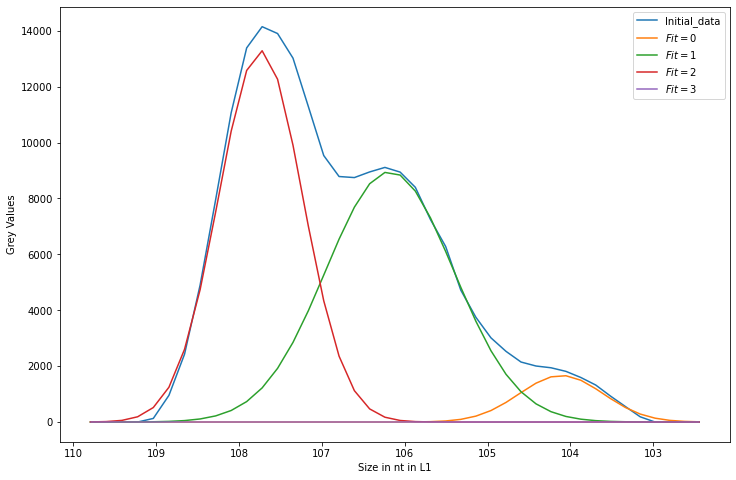

In [39]:
# performing clustering
number_of_clusters = 4
clusters_params4 = gmmClustering(generated_distribution,nComponents=number_of_clusters)
# performing curve fitting
optimized_parms4 = optimizeGmmParameter(cut_data, clusters_params4,gaussian_func)


plt.figure(figsize=(12, 8))
new_plot = plt.plot(cut_data['Size in nt in L1'], cut_data['Grey Values'], label='Initial_data')
for i in range(len(optimized_parms4)):
    plt.plot(cut_data.iloc[:,0],gaussian_func(cut_data.iloc[:,0],*optimized_parms4[i]), label='$Fit = {i}$'.format(i=i))

ax = plt.gca().invert_xaxis()
plt.xlabel("Size in nt in L1")
plt.ylabel("Grey Values")
plt.legend()
plt.show()

In [40]:
#Comparing with the previous results:

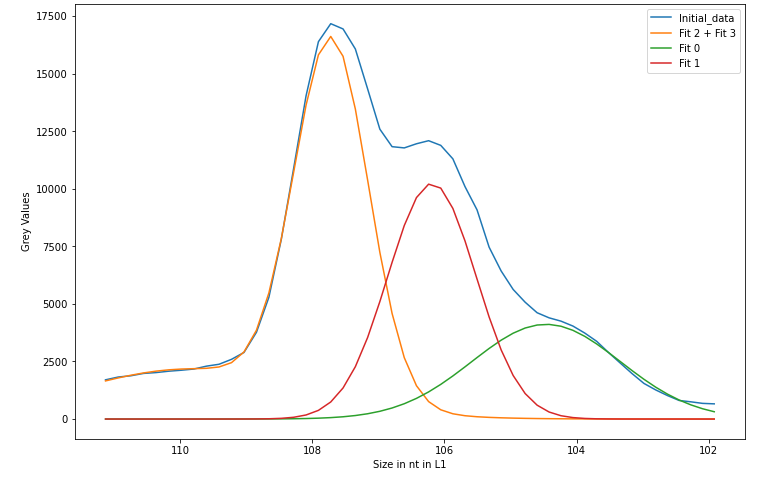

In [ ]:
#Getting discrete values:

In [43]:
sizes = data.iloc[:,1]
sizes

0      120.970000
1      120.760747
2      120.551856
3      120.343327
4      120.135158
          ...    
811     29.709526
812     29.658135
813     29.606832
814     29.555619
815     29.504494
Name: Size in nt in L1, Length: 816, dtype: float64

In [44]:
#Changing the type to integer
sizes=sizes.astype(int)

In [47]:
#A new data frame where size is an integer.
data_size = sizes.to_frame(name="Size in nt in L1")
df_int = pd.concat([sizes, df["Grey Values"]], axis=1)
df_int

,Size in nt in L1,Grey Values
0,120,0.0
1,120,0.0
2,120,0.0
3,120,0.0
4,120,0.0
...,...,...
811,29,0.0
812,29,0.0
813,29,0.0
814,29,0.0


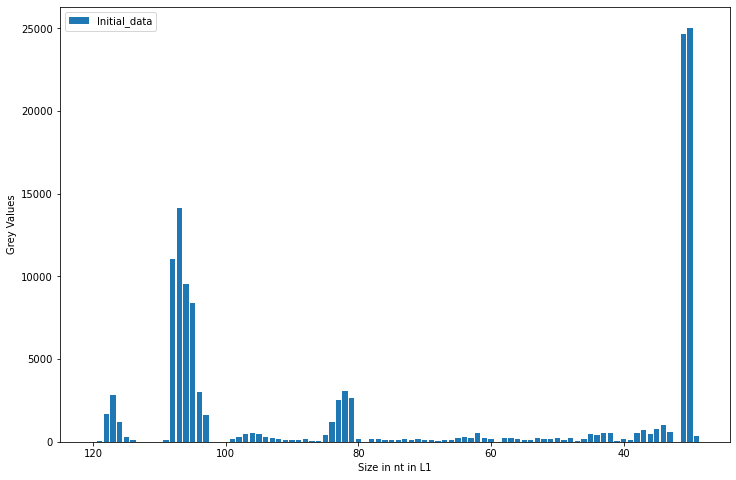

In [53]:
plt.figure(figsize=(12, 8))
new_plot = plt.bar(df_int['Size in nt in L1'], df_int['Grey Values'], label='Initial_data')
ax = plt.gca().invert_xaxis()
plt.xlabel("Size in nt in L1")
plt.ylabel("Grey Values")
plt.legend()
plt.show()

In [54]:
#Let's look at a peak:
cut_data_bar=df_int[56:97]
cut_data_bar

,Size in nt in L1,Grey Values
56,109,0.000000
57,109,0.000000
58,109,0.000000
59,109,0.000000
60,109,128.777497
61,108,954.372434
62,108,2427.171159
63,108,4899.530045
64,108,7957.651330
65,108,11065.785755


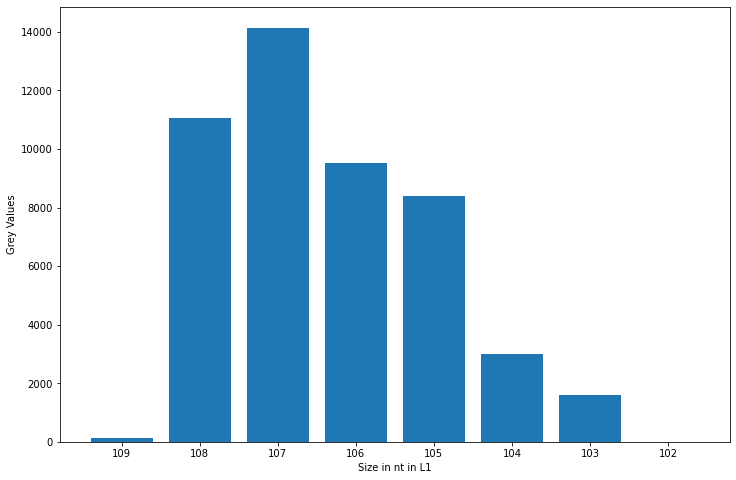

In [59]:
#Plot of the peak:
plt.figure(figsize=(12, 8))
plot = plt.bar(cut_data_bar['Size in nt in L1'], cut_data_bar['Grey Values'])
ax = plt.gca().invert_xaxis()
plt.xlabel("Size in nt in L1")
plt.ylabel("Grey Values")
plt.show()